<a href="https://colab.research.google.com/github/dhnanjay/HuggingFace/blob/main/2023_06_10_runpod_tgi_falcon_40b_instruct_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Pavel Shibanov [https://blog.experienced.dev/](https://blog.experienced.dev/langchain-falcon-40b-instruct-on-runpod-with-text-generation-inference/?utm_source=colab&utm_medium=notebook&utm_content=falcon-40b-instruct)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

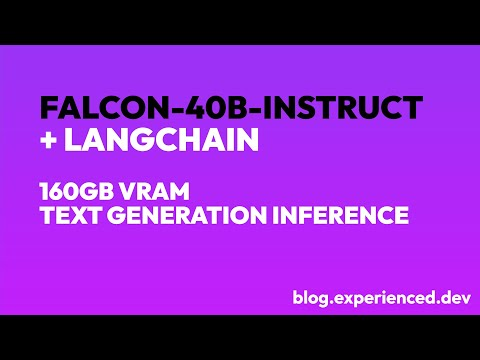

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("FhY8rx_X97k", width="560", height="315")

In [ ]:
%pip install langchain text-generation transformers runpod python-dotenv

In [ ]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [ ]:
import runpod
import os
from IPython.display import display, Markdown

runpod.api_key = os.getenv("RUNPOD_API_KEY", "your_runpod_api_key")

if runpod.api_key == "your_runpod_api_key":
    display(
        Markdown(
            "It appears that you don't have a RunPod API key. You can obtain one at [runpod.io](https://runpod.io?ref=s7508tca)"
        )
    )
    raise AssertionError("Missing RunPod API key")

In [ ]:
gpu_count = 2

pod = runpod.create_pod(
    name="Falcon-40B-Instruct",
    image_name="ghcr.io/huggingface/text-generation-inference:0.8",
    gpu_type_id="NVIDIA A100 80GB PCIe",
    cloud_type="COMMUNITY",
    docker_args=f"--model-id tiiuae/falcon-40b-instruct --num-shard {gpu_count}",
    gpu_count=gpu_count,
    volume_in_gb=195,
    container_disk_in_gb=5,
    ports="80/http",
    volume_mount_path="/data",
)

In [ ]:
from langchain.llms import HuggingFaceTextGenInference

inference_server_url = f'https://{pod["id"]}-80.proxy.runpod.net'
llm = HuggingFaceTextGenInference(
    inference_server_url=inference_server_url,
    max_new_tokens=1000,
    top_k=10,
    top_p=0.95,
    typical_p=0.95,
    temperature=0.1,
    repetition_penalty=1.03,
)

In [ ]:
from IPython.display import display, Markdown
from langchain import PromptTemplate
from langchain.chains import LLMChain

prompt = PromptTemplate(
    input_variables=["num_trees", "num_apples"],
    template="A farmer has {num_trees} apple trees. Each apple tree has {num_apples} apples. How many apples does the farmer have in total?",
)

chain = LLMChain(llm=llm, prompt=prompt)

In [ ]:
display(Markdown(chain.run({"num_trees": 100, "num_apples": 10})))

In [ ]:
display(Markdown(chain.run({"num_trees": 6, "num_apples": 8})))

In [ ]:
runpod.stop_pod(pod["id"])

In [ ]:
runpod.resume_pod(pod["id"], gpu_count=gpu_count)

In [ ]:
prompts = [
    "Imagine you are a tree experiencing its first winter. Describe your sensations.",
    "If you could give advice to a snowflake about to fall, what would it be?",
    "What conversation would a pair of shoes have at the end of a long day?",
    "Describe the first sunrise, as seen by the moon.",
    "You've just discovered a new planet; what do you name it and why?",
    "Write a letter from the perspective of an old, forgotten book in a dusty library.",
    "Narrate a day in the life of a cloud above a bustling city.",
    "How would a Martian describe the earth after its first visit?",
    "What would you say to convince a star to wish upon a human?",
    "You found a door in your house that wasn't there before. Where does it lead?",
    "Tell the story of a sunset from the viewpoint of a sailor at sea.",
    "Imagine you're a whisper traveling across a quiet room. What's your journey like?",
    "Describe the most adventurous day of a coffee bean, from the tree to the cup.",
    "What secret does the oldest animal in the zoo hold?",
    "How would you describe a rainbow to a blind alien?",
    "What conversation would a lighthouse have with the sea during a storm?",
    "What happens when a shooting star gets lost?",
    "Write about a day in the life of the person whose job it is to paint the colors of the autumn leaves.",
    "What do the northern lights gossip about?",
    "How would a single note from a forgotten song feel?",
    "Imagine the story a forgotten toy has to tell.",
    "What would an old, wise mountain tell a young, eager volcano?",
    "What advice does the last leaf of autumn give to the first snowflake of winter?",
    "What secret does a mirror hide from its own reflection?",
    "Describe the journey of a message in a bottle tossed into the sea 100 years ago.",
    "What happens when the moon falls in love with a comet?",
    "Imagine a heated debate between two contrasting colors.",
    "Describe a game of chess from the perspective of the pawns.",
    "How does a forgotten word feel when it is finally spoken again?",
    "What does a raindrop feel when it hits the sea?",
    "How would the first raindrop to touch the earth describe its experience?",
    "What is the life story of a piece of popcorn?",
    "If flowers could talk, what secrets would they reveal?",
    "What happens when an echo gets lost?",
    "How does a book feel when it is opened for the first time?",
    "What happens in a world where people can see music?",
    "Describe a city inhabited by shadows.",
    "How does the ocean feel about the sand on the beach?",
    "Tell the story of a grain of sand lost in the desert.",
    "What would you do if you found a diary from the future?",
    "Imagine you're a clock that can control time. What do you do?",
    "What would you see if you looked through a window into a world where dreams are reality?",
    "Tell the tale of the love between the North Wind and the South Wind.",
    "What happens when a forgotten fairy tale comes back to life?",
    "How would you describe the taste of happiness?",
    "Describe the sensation of a thought being born.",
    "If you could touch a memory, what would it feel like?",
    "Write about the moment a firefly realizes it can shine.",
    "How does a piece of music feel when it is played for the first time?",
    "What adventure awaits a paper boat set on a river?",
]

In [ ]:
len(prompts)

In [ ]:
from timeit import default_timer as timer

start = timer()
llm_result = llm.generate(prompts)
end = timer()
runpod.stop_pod(pod["id"])
dt = end - start
dt

In [ ]:
len(llm_result.generations)

In [ ]:
total_tokens = sum([llm.get_num_tokens(g[0].text) for g in llm_result.generations])
total_tokens

In [ ]:
tokens_per_second = total_tokens / dt
tokens_per_second

In [ ]:
from IPython.display import display, Markdown

for prompt, generation in zip(prompts, llm_result.generations):
    display(Markdown(f"### {prompt} \n {generation[0].text}"))

In [ ]:
runpod.stop_pod(pod["id"])
runpod.terminate_pod(pod["id"])